# Aim: Avalanche Effect progression across the DES rounds

The DES code from: https://github.com/RobinDavid/pydes/blob/master/pydes.py

### DES Code

In [4]:
#-*- coding: utf8 -*-

#Initial permut matrix for the datas
PI = [58, 50, 42, 34, 26, 18, 10, 2,
      60, 52, 44, 36, 28, 20, 12, 4,
      62, 54, 46, 38, 30, 22, 14, 6,
      64, 56, 48, 40, 32, 24, 16, 8,
      57, 49, 41, 33, 25, 17, 9, 1,
      59, 51, 43, 35, 27, 19, 11, 3,
      61, 53, 45, 37, 29, 21, 13, 5,
      63, 55, 47, 39, 31, 23, 15, 7]

#Initial permut made on the key
CP_1 = [57, 49, 41, 33, 25, 17, 9,
        1, 58, 50, 42, 34, 26, 18,
        10, 2, 59, 51, 43, 35, 27,
        19, 11, 3, 60, 52, 44, 36,
        63, 55, 47, 39, 31, 23, 15,
        7, 62, 54, 46, 38, 30, 22,
        14, 6, 61, 53, 45, 37, 29,
        21, 13, 5, 28, 20, 12, 4]

#Permut applied on shifted key to get Ki+1
CP_2 = [14, 17, 11, 24, 1, 5, 3, 28,
        15, 6, 21, 10, 23, 19, 12, 4,
        26, 8, 16, 7, 27, 20, 13, 2,
        41, 52, 31, 37, 47, 55, 30, 40,
        51, 45, 33, 48, 44, 49, 39, 56,
        34, 53, 46, 42, 50, 36, 29, 32]

#Expand matrix to get a 48bits matrix of datas to apply the xor with Ki
E = [32, 1, 2, 3, 4, 5,
     4, 5, 6, 7, 8, 9,
     8, 9, 10, 11, 12, 13,
     12, 13, 14, 15, 16, 17,
     16, 17, 18, 19, 20, 21,
     20, 21, 22, 23, 24, 25,
     24, 25, 26, 27, 28, 29,
     28, 29, 30, 31, 32, 1]

#SBOX
S_BOX = [
         
[[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7],
 [0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8],
 [4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0],
 [15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13],
],

[[15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10],
 [3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5],
 [0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15],
 [13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9],
],

[[10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8],
 [13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1],
 [13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7],
 [1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12],
],

[[7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15],
 [13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9],
 [10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4],
 [3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14],
],  

[[2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9],
 [14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6],
 [4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14],
 [11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3],
], 

[[12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11],
 [10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8],
 [9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6],
 [4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13],
], 

[[4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1],
 [13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6],
 [1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2],
 [6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12],
],
   
[[13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7],
 [1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2],
 [7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8],
 [2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11],
]
]

#Permut made after each SBox substitution for each round
P = [16, 7, 20, 21, 29, 12, 28, 17,
     1, 15, 23, 26, 5, 18, 31, 10,
     2, 8, 24, 14, 32, 27, 3, 9,
     19, 13, 30, 6, 22, 11, 4, 25]

#Final permut for datas after the 16 rounds
PI_1 = [40, 8, 48, 16, 56, 24, 64, 32,
        39, 7, 47, 15, 55, 23, 63, 31,
        38, 6, 46, 14, 54, 22, 62, 30,
        37, 5, 45, 13, 53, 21, 61, 29,
        36, 4, 44, 12, 52, 20, 60, 28,
        35, 3, 43, 11, 51, 19, 59, 27,
        34, 2, 42, 10, 50, 18, 58, 26,
        33, 1, 41, 9, 49, 17, 57, 25]

#Matrix that determine the shift for each round of keys
SHIFT = [1,1,2,2,2,2,2,2,1,2,2,2,2,2,2,1]

def string_to_bit_array(text):#Convert a string into a list of bits
    array = list()
    for char in text:
        binval = binvalue(char, 8)#Get the char value on one byte
        array.extend([int(x) for x in list(binval)]) #Add the bits to the final list
    return array

def bit_array_to_string(array): #Recreate the string from the bit array
    res = ''.join([chr(int(y,2)) for y in [''.join([str(x) for x in _bytes]) for _bytes in  nsplit(array,8)]])   
    return res

def binvalue(val, bitsize): #Return the binary value as a string of the given size 
    binval = bin(val)[2:] if isinstance(val, int) else bin(ord(val))[2:]
    if len(binval) > bitsize:
        raise "binary value larger than the expected size"
    while len(binval) < bitsize:
        binval = "0"+binval #Add as many 0 as needed to get the wanted size
    return binval

def nsplit(s, n):#Split a list into sublists of size "n"
    return [s[k:k+n] for k in range(0, len(s), n)]

ENCRYPT=1
DECRYPT=0

class des():
    def __init__(self):
        self.password = None
        self.text = None
        self.keys = list()
        
    def run(self, key, text, action=ENCRYPT, padding=False):
        if len(key) < 8:
            raise "Key Should be 8 bytes long"
        elif len(key) > 8:
            key = key[:8] #If key size is above 8bytes, cut to be 8bytes long
        
        self.password = key
        self.text = text
        
        rounds = [] # changed
        
        if padding and action==ENCRYPT:
            self.addPadding()
        elif len(self.text) % 8 != 0:#If not padding specified data size must be multiple of 8 bytes
            raise "Data size should be multiple of 8"
        
        self.generatekeys() #Generate all the keys
        text_blocks = nsplit(self.text, 8) #Split the text in blocks of 8 bytes so 64 bits
        result = list()
        for block in text_blocks:#Loop over all the blocks of data
            block = string_to_bit_array(block)#Convert the block in bit array
            block = self.permut(block,PI)#Apply the initial permutation
            g, d = nsplit(block, 32) #g(LEFT), d(RIGHT)
            tmp = None
            for i in range(16): #Do the 16 rounds
                d_e = self.expand(d, E) #Expand d to match Ki size (48bits)
                if action == ENCRYPT:
                    tmp = self.xor(self.keys[i], d_e)#If encrypt use Ki
                else:
                    tmp = self.xor(self.keys[15-i], d_e)#If decrypt start by the last key
                tmp = self.substitute(tmp) #Method that will apply the SBOXes
                tmp = self.permut(tmp, P)
                tmp = self.xor(g, tmp)
                g = d
                d = tmp
                rounds.append([g, d]) # changed
            result += self.permut(d+g, PI_1) #Do the last permut and append the result to result
        final_res = bit_array_to_string(result)
        if padding and action==DECRYPT:
            return self.removePadding(final_res), rounds #Remove the padding if decrypt and padding is true (changed)
        else:
            return final_res, rounds #Return the final string of data ciphered/deciphered (changed)
    
    def substitute(self, d_e):#Substitute bytes using SBOX
        subblocks = nsplit(d_e, 6)#Split bit array into sublist of 6 bits
        result = list()
        for i in range(len(subblocks)): #For all the sublists
            block = subblocks[i]
            row = int(str(block[0])+str(block[5]),2)#Get the row with the first and last bit
            column = int(''.join([str(x) for x in block[1:][:-1]]),2) #Column is the 2,3,4,5th bits
            val = S_BOX[i][row][column] #Take the value in the SBOX appropriated for the round (i)
            bin = binvalue(val, 4)#Convert the value to binary
            result += [int(x) for x in bin]#And append it to the resulting list
        return result
        
    def permut(self, block, table):#Permut the given block using the given table (so generic method)
        return [block[x-1] for x in table]
    
    def expand(self, block, table):#Do the exact same thing than permut but for more clarity has been renamed
        return [block[x-1] for x in table]
    
    def xor(self, t1, t2):#Apply a xor and return the resulting list
        return [x^y for x,y in zip(t1,t2)]
    
    def generatekeys(self):#Algorithm that generates all the keys
        self.keys = []
        key = string_to_bit_array(self.password)
        key = self.permut(key, CP_1) #Apply the initial permut on the key
        g, d = nsplit(key, 28) #Split it in to (g->LEFT),(d->RIGHT)
        for i in range(16):#Apply the 16 rounds
            g, d = self.shift(g, d, SHIFT[i]) #Apply the shift associated with the round (not always 1)
            tmp = g + d #Merge them
            self.keys.append(self.permut(tmp, CP_2)) #Apply the permut to get the Ki

    def shift(self, g, d, n): #Shift a list of the given value
        return g[n:] + g[:n], d[n:] + d[:n]
    
    def addPadding(self):#Add padding to the datas using PKCS5 spec.
        pad_len = 8 - (len(self.text) % 8)
        self.text += pad_len * chr(pad_len)
    
    def removePadding(self, data):#Remove the padding of the plain text (it assume there is padding)
        pad_len = ord(data[-1])
        return data[:-pad_len]
    
    def encrypt(self, key, text, padding=False):
        return self.run(key, text, ENCRYPT, padding)
    
    def decrypt(self, key, text, padding=False):
        return self.run(key, text, DECRYPT, padding)
    
if __name__ == '__main__':
    key = "secretke"
    text= "Hello da"
    d = des()
    r, rounds = d.encrypt(key,text)
    r2, roudnds2 = d.decrypt(key,r)
    print("Example")
    print("Key: ", key)
    print("Ciphered: %r" % r)
    print("Deciphered: ", r2)

Example
Key:  secretke
Ciphered: '[7\x89Þ|\x86M;'
Deciphered:  Hello da


### Different plaintexts with single key

I have chosen 6 different plain text having 5 different hamming distance in range [1,5] encrypted using single random key

Distinct Plain Text and Single Secret Key
AxesSubplot(0.125,0.125;0.775x0.755)


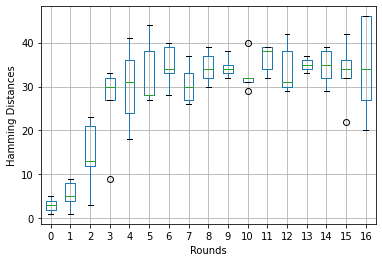

In [5]:
import random
import string
import pandas as pd

# To given Hamming Distances for given DES rounds of distict two keys and single plain text
def helperhd(rounds1, rounds2, ihd):
    y = [ihd]
    for i in range(16):
        hd = 0
        for k in range(2):
            for j in range(32):
                if rounds1[i][k][j] != rounds2[i][k][j]:
                    hd += 1
        y.append(hd)
    return y

# It plots the box plot for distict Rounds
def makeplot(key, texts):
    df = pd.DataFrame()
    for i in range(1,6):
        r1, rounds1 = d.encrypt(key, texts[0])
        r2, rounds2 = d.encrypt(key, texts[i])
        y = helperhd(rounds1, rounds2, i);
        df['HD'+str(i)] = y
    df = df.T
    boxplot = df.boxplot()
    boxplot.set_xlabel("Rounds")
    boxplot.set_ylabel("Hamming Distances")
    print('Distinct Plain Text and Single Secret Key')
    print(boxplot)

# Generating Random Key
secret_key = ''.join(random.choice(string.ascii_lowercase) for i in range(8))
# Distict plain text with distinct Hamming Distance
texts = ['Hello da', 'Hello ea', 'Hfllo da', 'Hfllo ea', 'Jfllo ea', 'Kfllo ea']
        #   x           1 HD        2 HD.      3 HD.        4 HD        5 HD     -> corresponding to x

d = des()

makeplot(secret_key, texts)

### Different keys with single plain text

I have used 6 different keys with HD ranging [1,5] and using one random plain text

Distinct Secret Keys and Single Plain Text
AxesSubplot(0.125,0.125;0.775x0.755)


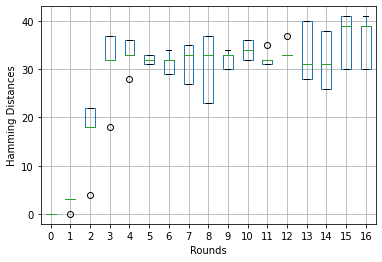

In [6]:
import random
import string
import pandas as pd

# To given Hamming Distances for given DES rounds of distict two plain text and single key
def helperhd(rounds1, rounds2, ihd):
    y = [0]
    for i in range(16):
        hd = 0
        for k in range(2):
            for j in range(32):
                if rounds1[i][k][j] != rounds2[i][k][j]:
                    hd += 1
        y.append(hd)
    return y

# It plots the box plot for distict Rounds
def makeplot(keys, text):
    df = pd.DataFrame()
    for i in range(1,6):
        r1, rounds1 = d.encrypt(keys[0], text)
        r2, rounds2 = d.encrypt(keys[i], text)
        y = helperhd(rounds1, rounds2, i);
        df['HD'+str(i)] = y
    df = df.T
    boxplot = df.boxplot()
    boxplot.set_xlabel("Rounds")
    boxplot.set_ylabel("Hamming Distances")
    print('Distinct Secret Keys and Single Plain Text')
    print(boxplot)

# Generating random Plain Text
plaintext = ''.join(random.choice(string.ascii_lowercase) for i in range(8))
# distinct keys with distinct Hamming Distances
secret_keys = ['Hello da', 'Jello da', 'Hfllo da', 'Hfllo ea', 'Jfllo ea', 'Kfllo ea']
        #   x           1 HD        2 HD.      3 HD.        4 HD        5 HD     -> corresponding to x

d = des()

makeplot(secret_keys, plaintext)